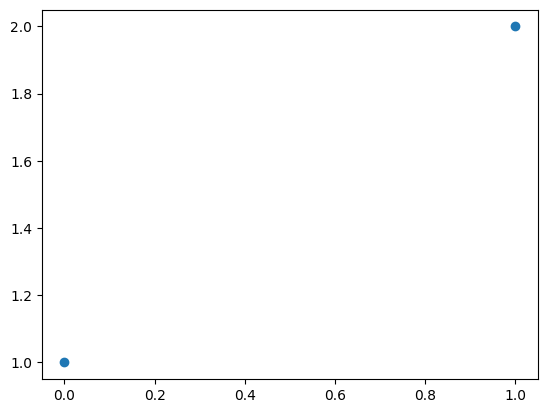

In [1]:
import sys
sys.path.append('f:/seismic/code/core')
sys.path.append('/seismic/code/core')
sys.path.append('/kaggle/input/my-seis-library/')
import kaggle_support as kgs
import importlib
import numpy as np
import matplotlib.pyplot as plt
import glob
import copy
import os
import seis_forward
plt.scatter([0,1],[1,2])
#fls.download_kaggle_dataset('jeroencottaar/byu-many-models-2/', fls.result_dir + '/many_full_res/')

In [2]:
importlib.reload(kgs)
data = kgs.Data()
data.seismogram.filename = 'F:\\seismic\\data\\train_samples\\FlatVel_A/data\\data1.npy'
data.seismogram.ind=5
data.velocity = kgs.Velocity()
data.velocity.filename = 'F:\\seismic\\data\\train_samples\\FlatVel_A/model\\model1.npy'
data.velocity.ind=5
data.check_constraints()
data.load_to_memory()
#data.unload()

In [3]:
importlib.reload(kgs)
data=kgs.load_all_train_data()
print(len(data))
for d in data:
    d.check_constraints()

10000


In [64]:
%%time
importlib.reload(seis_forward)
kgs.profiling=False
data[0].load_to_memory()
seis_pred = seis_forward.vel_to_seis(data[0].velocity.data, data[0].velocity.min_vel)

CPU times: total: 328 ms
Wall time: 332 ms


In [65]:
kgs.rms(seis_pred[:,2:,:]-data[0].seismogram.data[:,:,:])

6.1522696e-05

In [92]:
data[0].velocity.data.dtype

dtype('float32')

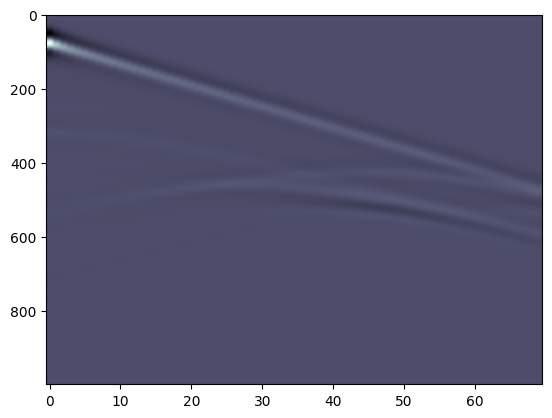

In [75]:
plt.imshow(data[0].seismogram.data[0,...],cmap='bone',aspect='auto')

In [76]:
plt.imshow(data[0].seismogram.data[0,...]-seis_pred[0,:,:],cmap='bone',aspect='auto')

ValueError: operands could not be broadcast together with shapes (999,70) (1000,70) 